In [2]:
!pip install pymysql
import pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [3]:
dbConn = pymysql.connect(host='am-de300.clw42ssy4ei4.us-east-1.rds.amazonaws.com',
                     port=3306,
                     user='admin',
                     passwd='OregonDucks24-',
                     database='HW1')

dbCursor = dbConn.cursor()

In [10]:
sql = """
      select avg(TOTALAREA_MODE) from hwdata where TOTALAREA_MODE <> 0
      """
dbCursor.execute(sql)
avg = dbCursor.fetchone()[0]
sql = """
      update hwdata
      set TOTALAREA_MODE = %s
      where TOTALAREA_MODE = 0
      """
dbCursor.execute(sql, [avg]) # We are setting total area mode to be the average of the rest of the values since we do not know much about the dataset and it seems the most reasonable

0

In [11]:
sql = """
      select avg(TOTALAREA_MODE) from hwdata where EXT_SOURCE_1 <> 0
      """
dbCursor.execute(sql)
avg = dbCursor.fetchone()[0]
sql = """
      update hwdata
      set EXT_SOURCE_1 = %s
      where EXT_SOURCE_1 = 0
      """
dbCursor.execute(sql, [avg]) # Doing the same with ext sources
sql = """
      select avg(TOTALAREA_MODE) from hwdata where EXT_SOURCE_2 <> 0
      """
dbCursor.execute(sql)
avg = dbCursor.fetchone()[0]
sql = """
      update hwdata
      set EXT_SOURCE_2 = %s
      where EXT_SOURCE_2 = 0
      """
dbCursor.execute(sql, [avg]) # Doing the same with ext sources
sql = """
      select avg(TOTALAREA_MODE) from hwdata where EXT_SOURCE_3 <> 0
      """
dbCursor.execute(sql)
avg = dbCursor.fetchone()[0]
sql = """
      update hwdata
      set EXT_SOURCE_3 = %s
      where EXT_SOURCE_3 = 0
      """
dbCursor.execute(sql, [avg]) # Doing the same with ext sources

5939

In [22]:
sql = """
      select avg(AMT_INCOME_TOTAL), stddev_samp(AMT_INCOME_TOTAL) from hwdata;
      """
dbCursor.execute(sql)
(avg_income, std_income) = dbCursor.fetchone()
avg_income = float(avg_income)
min_bound = avg_income - 3 * std_income
max_bound = avg_income + 3 * std_income

In [23]:
sql = """
      select AMT_INCOME_TOTAL from hwdata where AMT_INCOME_TOTAL < %s or AMT_INCOME_TOTAL > %s;
      """
dbCursor.execute(sql, [min_bound, max_bound])
outliers = dbCursor.fetchall()
print(len(outliers)) # going to keep the outliers as this is likely to be the super-high income people of the dataset

320


In [28]:
sql = """
      select avg(AMT_CREDIT), stddev_samp(AMT_CREDIT) from hwdata;
      """
dbCursor.execute(sql)
(avg_credit, std_credit) = dbCursor.fetchone()
avg_credit = float(avg_credit)
min_bound = avg_credit - 3 * std_credit
max_bound = avg_credit + 3 * std_credit
sql = """
      select AMT_CREDIT from hwdata where AMT_CREDIT < %s or AMT_CREDIT > %s;
      """
dbCursor.execute(sql, [min_bound, max_bound])
outliers = dbCursor.fetchall()
print(len(outliers)) # same as before, likely just high-earners
dbConn.commit()

341


In [32]:
import pandas as pd
sql = """
      select * from hwdata
      """
dbCursor.execute(sql)
df = pd.read_sql(sql, dbConn)
df

<ipython-input-32-d11f5ffb9092>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, dbConn)


,TARGET,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,AMT_CREDIT,TOTALAREA_MODE,HOUSETYPE_MODE,EXT_SOURCE_1,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3,NAME_EDUCATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS
0,0,0,2,M,Y,Y,225000,Commercial associate,382500.0,0.019800,block of flats,0.806048,-3336,-22787,0.740220,0.684828,Higher education,3,House / apartment,Civil marriage
1,0,0,2,F,N,N,180000,Commercial associate,225000.0,0.003000,terraced house,0.632088,-874,-9799,0.400752,0.586740,Higher education,1,Rented apartment,Married
2,0,0,2,M,N,N,153990,Commercial associate,654498.0,0.104151,,0.105365,-241,-12040,0.369478,0.103832,Secondary / secondary special,0,With parents,Married
3,0,3,5,F,N,N,99000,Working,299772.0,0.104151,,0.105365,-3148,-10351,0.290338,0.597192,Secondary / secondary special,3,Rented apartment,Married
4,0,0,2,F,Y,Y,135000,Commercial associate,254700.0,0.027000,block of flats,0.105365,-3272,-12837,0.449632,0.853731,Secondary / secondary special,3,House / apartment,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30741,1,0,2,F,N,N,135000,Working,1436850.0,0.203200,block of flats,0.105365,-1007,-16690,0.094752,0.538863,Higher education,0,With parents,Married
30742,1,2,4,M,Y,N,225000,Commercial associate,101880.0,0.104151,,0.105365,-1378,-11621,0.601015,0.103832,Higher education,3,Office apartment,Married
30743,1,0,2,M,N,N,112500,Working,288873.0,0.104151,,0.105365,-275,-15578,0.035181,0.103832,Secondary / secondary special,0,With parents,Civil marriage
30744,1,0,1,M,N,Y,135000,Working,284400.0,0.104151,,0.173156,-564,-16694,0.092562,0.235311,Secondary / secondary special,4,House / apartment,Single / not married


In [45]:
df.describe()

,TARGET,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,TOTALAREA_MODE,EXT_SOURCE_1,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR
count,30746.000000,30746.000000,30746.000000,3.074600e+04,3.074600e+04,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000
mean,0.080726,0.414558,2.149776,1.688084e+05,6.025198e+05,0.104151,0.280381,-1961.603948,-16080.999967,0.514126,0.433412,1.648702
std,0.272418,0.726338,0.913627,1.012798e+05,4.045833e+05,0.078768,0.242634,2310.404347,4353.536640,0.191930,0.237754,1.852265
min,0.000000,0.000000,1.000000,2.700000e+04,4.500000e+04,0.000100,0.015053,-17139.000000,-25201.000000,0.000017,0.000527,0.000000
25%,0.000000,0.000000,2.000000,1.125000e+05,2.700000e+05,0.067900,0.105365,-2755.000000,-19695.750000,0.392517,0.189595,0.000000
50%,0.000000,0.000000,2.000000,1.485000e+05,5.212800e+05,0.104151,0.105365,-1233.000000,-15793.500000,0.565519,0.465069,1.000000
75%,0.000000,1.000000,3.000000,2.025000e+05,8.086500e+05,0.104151,0.461622,-288.000000,-12472.250000,0.663684,0.638044,3.000000
max,1.000000,19.000000,20.000000,4.500000e+06,4.050000e+06,1.000000,0.941080,0.000000,-7673.000000,0.855000,0.896010,19.000000


<Axes: title={'center': 'AMT_INCOME_TOTAL'}, xlabel='CODE_GENDER'>

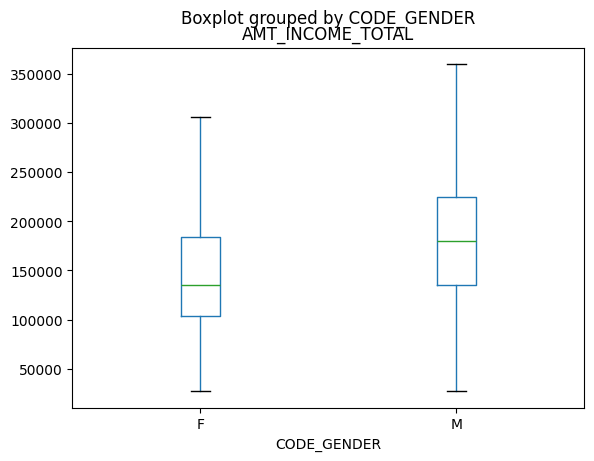

In [50]:
df.boxplot(by='CODE_GENDER', column=['AMT_INCOME_TOTAL'], grid=False, showfliers=False) # outliers are not useful to look at here. shows an interesting wage gap

<Axes: title={'center': 'AMT_INCOME_TOTAL'}, xlabel='FLAG_OWN_CAR'>

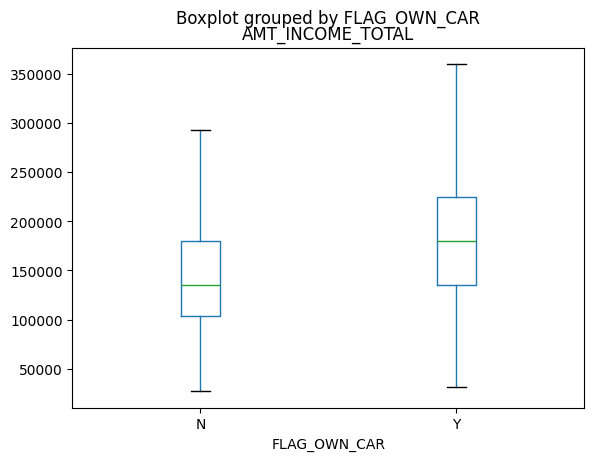

In [56]:
df.boxplot(by='FLAG_OWN_CAR', column=['AMT_INCOME_TOTAL'], grid=False, showfliers=False) # I checked realty too and was surprised that there was no difference.

<Axes: xlabel='Age', ylabel='AMT_CREDIT'>

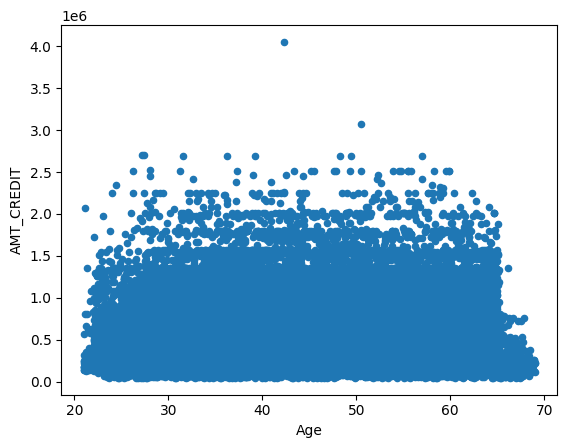

In [51]:
(df.assign(Age=df["DAYS_BIRTH"]/-365.25).plot.scatter(x="Age", y="AMT_CREDIT")) # I thought I might see a trend here but none is apparent.